<a href="https://colab.research.google.com/github/aashish3808/generative-ai-for-beginners/blob/main/Mobile_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.2348 - loss: 1.9558 - val_accuracy: 0.2975 - val_loss: 1.3834
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2341 - loss: 1.5081 - val_accuracy: 0.2925 - val_loss: 1.3845
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2635 - loss: 1.4492 - val_accuracy: 0.2675 - val_loss: 1.3853
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2717 - loss: 1.4144 - val_accuracy: 0.2525 - val_loss: 1.3855
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2633 - loss: 1.4095 - val_accuracy: 0.2475 - val_loss: 1.3861
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2566 - loss: 1.4114 - val_accuracy: 0.2450 - val_loss: 1.3867
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2750 - loss: 1.3915 - val_accuracy: 0.2450 - val_loss: 1.3868
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2595 - loss: 1.3972 - val_accuracy: 0.2450 - val_loss: 1.

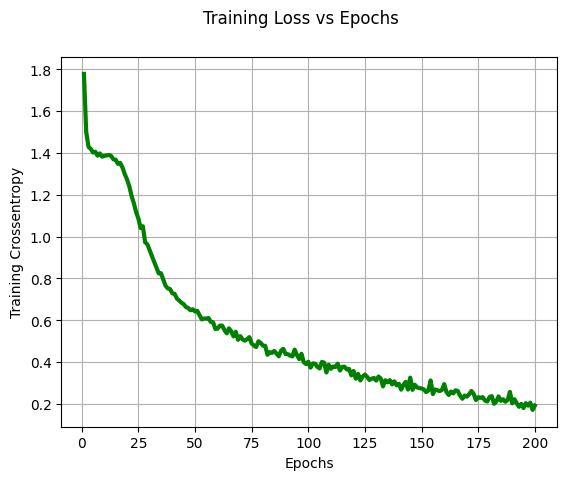

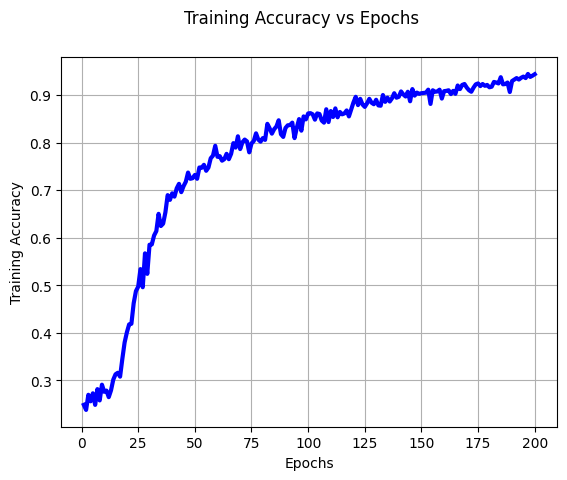

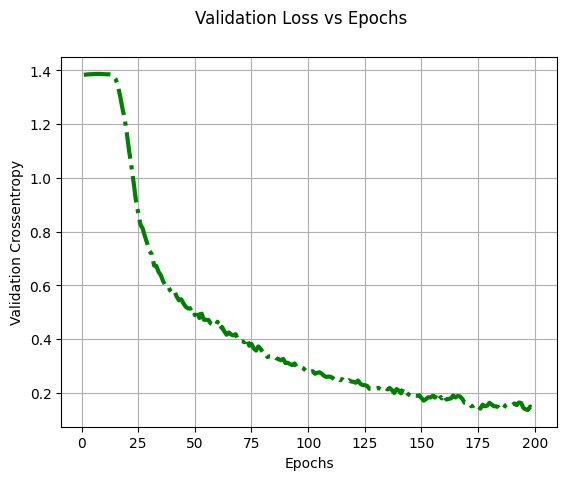

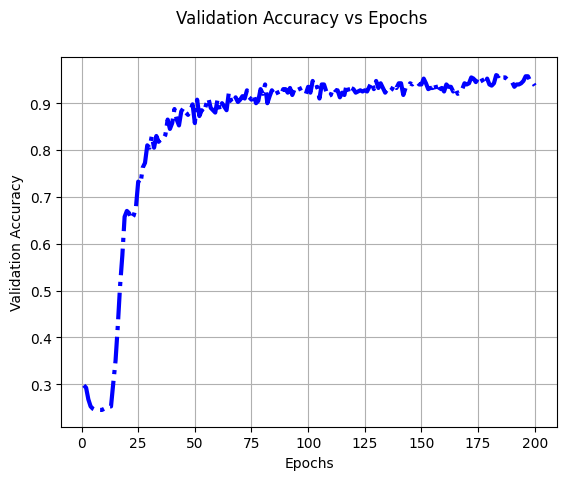

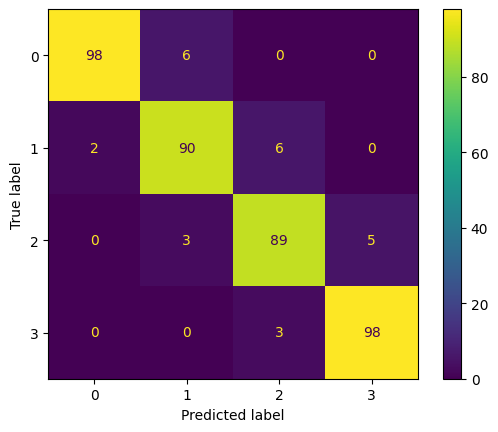

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


df = pd.read_csv("mobile_prices.csv")
X = df.iloc[:,:20].values
y = df.iloc[:,20:21].values

ss = StandardScaler()
X = ss.fit_transform(X)

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.2,random_state=11)

oh = OneHotEncoder()
ytrain = oh.fit_transform(ytrain).toarray()

model = Sequential()
model.add(Dense(64, input_shape=(20,), activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(4, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


ytestoh = oh.fit_transform(ytest).toarray()
history = model.fit(Xtrain, ytrain, epochs=200, batch_size=100, validation_data=(Xtest,ytestoh))

ypred = model.predict(Xtest)
ypred = np.argmax(ypred,axis=1)

score = accuracy_score(ypred,ytest)
print('Accuracy score is',100*score,'%')


cmat = confusion_matrix(ytest, ypred)
print('Confusion matrix of Neural Network is \n',cmat,'\n')


plt.figure(1);
plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'],'g-',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Training Crossentropy')
plt.grid(1,which='both')
plt.suptitle('Training Loss vs Epochs')
plt.show()

plt.figure(2);
plt.plot(range(1, len(history.history['loss']) + 1), history.history['accuracy'],'b-',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.grid(1,which='both')
plt.suptitle('Training Accuracy vs Epochs')
plt.show()

plt.figure(3);
plt.plot(range(1, len(history.history['loss']) + 1), history.history['val_loss'],'g-.',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Validation Crossentropy')
plt.grid(1,which='both')
plt.suptitle('Validation Loss vs Epochs')
plt.show()

plt.figure(4);
plt.plot(range(1, len(history.history['loss']) + 1), history.history['val_accuracy'],'b-.',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.grid(1,which='both')
plt.suptitle('Validation Accuracy vs Epochs')
plt.show()


disp = ConfusionMatrixDisplay(confusion_matrix=cmat)
disp.plot()


